# Pandemic Vulnerability Index (PVI)

----------

## Question : What contributes to vaccine hesitancy?
----------
### Final csv `PVI_05_Oct_results_clean.csv`

- shape (3142, 23)

22 measures
       
 4   Cases              3142 non-null   int64  
 5   Deaths             3142 non-null   int64  
 6   Sick               3140 non-null   float64
 7   Spread             3136 non-null   float64
 8   DaytimePopDensity  3142 non-null   float64
 9   Traffic            3142 non-null   float64
 10  SVIHousing         3142 non-null   float64
 11  Not vaccinated           3142 non-null   float64
 12  DistancingGrade    3142 non-null   float64
 13  Testing            3142 non-null   int64  
 14  PctBeds            3142 non-null   float64
 15  PctVentilators     3142 non-null   float64
 16  PctBlack           3142 non-null   float64
 17  PctNative          3142 non-null   float64
 18  AirPollution       3108 non-null   float64
 19  PctGE65            3142 non-null   float64
 23  Obesity            3142 non-null   float64
 24  PctNoIns           3142 non-null   float64
 25  SVISocioeconomic   3142 non-null   float64



The original key indicators from the data, their weights in the final PVI and their meaning.
The PVI model gives an idex for each of these in the dataset we are currently exploring.
       
- Infection Rate = 25% in total
  - Transmissible Cases = 20% 
      - Daily
      - The initial number represented cases from the last 14 days divided by population size. Because of the 14-day incubation period, the cases identified in that time period are the most likely to be transmissible. This metric is the number of such “contagious” individuals relative to the population, so a greater number indicates more likely continued spread of disease.
  - Disease Spread = 5%
      - Daily
      - The initial number represented Fraction of total cases that are from the last 14 days (one incubation period). Because COVID-19 is thought to have an incubation period of about 14 days, only a sustained decline in new infections over 2 weeks is sufficient to signal reduction in disease spread. This metric is always between 0 and 1, with values near 1 during exponential growth phase, and declining linearly to zero over 14 days if there are no new infections.
- Pop Concentration = 15% in total
  - Pop Mobility = 10%
      - Static
      - The initial number represented Estimated daytime population. Greater daytime population density is expected to increase the spread of infection because more people are in closer proximity to each other.
  - Residential Density = 5%
      - Static
      - The initial number represented Average traffic volume per meter of major roadways in the county from 2018 EPA EJSCREEN. Greater traffic volume is expected to increase the spread of infection due to more people moving and interaction.
- Intervention Measures: 25%
  - Not vaccinated = 15%
      - Daily
      - The initial number represented Percentage of UNVACCINATED residents. Disease spread will be reduced with fewer unvaccinated residents.
   - Social Distancing = 5%
       - Daily
       - The initial number represented Unacast social distancing scoreboard grade is assigned by looking at the change in overall distance travelled and the change in nonessential visits relative to baseline (previous year), based on cell phone mobility data. The grade is converted to a numerical score, with higher values being less social distancing (worse score) is expected to increase the spread of infection because more people are interacting with other.
    - Testing = 5%   
       - Daily
       - The initial number represented Population divided by tests performed (currently only state-wide statistics are available). This is the inverse of the tests per population, so greater numbers indicate less testing. Lower testing rates mean it is more likely that infections are undetected, so would be expected to increase the spread of infection.
- Health & Environment = 35% in total
   - Hospital Beds = 10%
       - Daily
       - The initial number represented Summation of hospital beds for hospitals with “OPEN” status and “GENERAL MEDIAL AND SURGICAL” description.
   - Hospital Ventilators = 10%
       - Daily 
       - The initial number represented Percentage of ventilators in use. This is the percentage of ventilators across all medical facility that are being used by patients for any medical condition.
   - Pop Demographics = 3%
       - Static
       - The initial numbers here took into considertation the Percentage of population who self-identify as Black or African American and 	Percentage of population who self-identify as American Indian or Alaska Native.
   - Air Pollution = 3 %
       - Static
       - The initial number represented
   - Age Distribution
       - Static
       - The initial number represented
   - Co-morbidities
       - Static
        - The initial number represented
   - Health Disparities
       - Static
        - The initial number represented

#### The index for each measure is from 0 to 1. Higher values mean worse conditions. The total PVI is calculated linearly from all the measures, each with their respective weight. A higher PVI means higher Vulnerability. 


In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import os
from pathlib import Path
import csv

project_path = str(Path().resolve().parent)
print(project_path)
clean_csv_files = project_path + '\\data\\clean\\'

import sys
sys.path.append(project_path)

C:\Users\iovuf\Projects\DS4A_team27


In [2]:
data = pd.read_csv(clean_csv_files+'PVI_05_Oct_data_clean.csv', delimiter=',')
results = pd.read_csv(clean_csv_files+'PVI_05_Oct_results_clean.csv', delimiter=',')
results = results[["fips", "ToxPi Score"]]

In [3]:
pvi = pd.merge(data, results, on = "fips")

In [4]:
pvi

,fips,Name,Cases,Deaths,Sick,Spread,DaytimePopDensity,Traffic,SVIHousing,Vaccines,...,PctNative,AirPollution,PctGE65,PrematureDeath,Smoking,Diabetes,Obesity,PctNoIns,SVISocioeconomic,ToxPi Score
0,1001,"Alabama, Autauga",9790,142,4.730131,0.026864,76.0,88.457040,0.3741,0.658,...,0.004802,11.7,14.6,8128.591190,0.180816,0.111,0.333,7.1,0.3631,0.531549
1,1003,"Alabama, Baldwin",36602,518,3.614314,0.021529,121.0,86.997430,0.3359,0.571,...,0.007724,10.3,19.5,7354.122530,0.174890,0.107,0.310,8.9,0.2232,0.510690
2,1005,"Alabama, Barbour",3521,71,4.742575,0.033513,27.5,102.291762,0.9889,0.643,...,0.006591,11.5,18.0,10253.573403,0.220000,0.176,0.417,11.3,0.9780,0.595956
3,1007,"Alabama, Bibb",4163,83,8.214286,0.044199,28.9,29.335580,0.7189,0.702,...,0.004375,11.2,16.3,11977.539484,0.191142,0.145,0.376,10.7,0.7694,0.539207
4,1009,"Alabama, Blount",9878,162,6.863762,0.040190,71.7,33.411782,0.1741,0.735,...,0.006535,11.7,17.8,11335.071134,0.192087,0.170,0.338,10.8,0.6143,0.493368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,"Wyoming, Sweetwater",7015,65,14.331839,0.087954,4.5,154.754714,0.4120,0.635,...,0.015447,5.1,10.7,7831.827655,0.180734,0.088,0.298,11.3,0.2576,0.544375
3138,56039,"Wyoming, Teton",4953,13,9.098393,0.042399,6.7,135.188600,0.6266,0.209,...,0.009142,4.9,13.6,2730.603992,0.145464,0.022,0.124,12.7,0.0025,0.403088
3139,56041,"Wyoming, Uinta",3578,25,12.414405,0.070430,9.8,96.191604,0.6657,0.607,...,0.014188,5.9,12.1,7330.683549,0.172127,0.113,0.358,11.2,0.3583,0.461476
3140,56043,"Wyoming, Washakie",1422,27,31.578947,0.175105,3.8,82.822155,0.2751,0.650,...,0.018136,4.8,20.7,6586.049959,0.168594,0.117,0.288,15.0,0.4293,0.540027


In [5]:
# Check for nan
pvi.isnull().values.any()

True

In [6]:
pvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fips               3142 non-null   int64  
 1   Name               3142 non-null   object 
 2   Cases              3142 non-null   int64  
 3   Deaths             3142 non-null   int64  
 4   Sick               3140 non-null   float64
 5   Spread             3136 non-null   float64
 6   DaytimePopDensity  3142 non-null   float64
 7   Traffic            3142 non-null   float64
 8   SVIHousing         3142 non-null   float64
 9   Vaccines           3142 non-null   float64
 10  DistancingGrade    3142 non-null   float64
 11  Testing            3142 non-null   int64  
 12  PctBeds            3142 non-null   float64
 13  PctVentilators     3142 non-null   float64
 14  PctBlack           3142 non-null   float64
 15  PctNative          3142 non-null   float64
 16  AirPollution       3108 

In [7]:
pvi.shape

(3142, 25)

In [8]:
pvi.columns

Index(['fips', 'Name', 'Cases', 'Deaths', 'Sick', 'Spread',
       'DaytimePopDensity', 'Traffic', 'SVIHousing', 'Vaccines',
       'DistancingGrade', 'Testing', 'PctBeds', 'PctVentilators', 'PctBlack',
       'PctNative', 'AirPollution', 'PctGE65', 'PrematureDeath', 'Smoking',
       'Diabetes', 'Obesity', 'PctNoIns', 'SVISocioeconomic', 'ToxPi Score'],
      dtype='object')

In [9]:
pvi = pvi.rename(columns = {"Vaccines": "Not vaccinated", "ToxPi Score": "PVI"})
pvi

,fips,Name,Cases,Deaths,Sick,Spread,DaytimePopDensity,Traffic,SVIHousing,Not vaccinated,...,PctNative,AirPollution,PctGE65,PrematureDeath,Smoking,Diabetes,Obesity,PctNoIns,SVISocioeconomic,PVI
0,1001,"Alabama, Autauga",9790,142,4.730131,0.026864,76.0,88.457040,0.3741,0.658,...,0.004802,11.7,14.6,8128.591190,0.180816,0.111,0.333,7.1,0.3631,0.531549
1,1003,"Alabama, Baldwin",36602,518,3.614314,0.021529,121.0,86.997430,0.3359,0.571,...,0.007724,10.3,19.5,7354.122530,0.174890,0.107,0.310,8.9,0.2232,0.510690
2,1005,"Alabama, Barbour",3521,71,4.742575,0.033513,27.5,102.291762,0.9889,0.643,...,0.006591,11.5,18.0,10253.573403,0.220000,0.176,0.417,11.3,0.9780,0.595956
3,1007,"Alabama, Bibb",4163,83,8.214286,0.044199,28.9,29.335580,0.7189,0.702,...,0.004375,11.2,16.3,11977.539484,0.191142,0.145,0.376,10.7,0.7694,0.539207
4,1009,"Alabama, Blount",9878,162,6.863762,0.040190,71.7,33.411782,0.1741,0.735,...,0.006535,11.7,17.8,11335.071134,0.192087,0.170,0.338,10.8,0.6143,0.493368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,"Wyoming, Sweetwater",7015,65,14.331839,0.087954,4.5,154.754714,0.4120,0.635,...,0.015447,5.1,10.7,7831.827655,0.180734,0.088,0.298,11.3,0.2576,0.544375
3138,56039,"Wyoming, Teton",4953,13,9.098393,0.042399,6.7,135.188600,0.6266,0.209,...,0.009142,4.9,13.6,2730.603992,0.145464,0.022,0.124,12.7,0.0025,0.403088
3139,56041,"Wyoming, Uinta",3578,25,12.414405,0.070430,9.8,96.191604,0.6657,0.607,...,0.014188,5.9,12.1,7330.683549,0.172127,0.113,0.358,11.2,0.3583,0.461476
3140,56043,"Wyoming, Washakie",1422,27,31.578947,0.175105,3.8,82.822155,0.2751,0.650,...,0.018136,4.8,20.7,6586.049959,0.168594,0.117,0.288,15.0,0.4293,0.540027


In [10]:
pvi.describe()

,fips,Cases,Deaths,Sick,Spread,DaytimePopDensity,Traffic,SVIHousing,Not vaccinated,DistancingGrade,...,PctNative,AirPollution,PctGE65,PrematureDeath,Smoking,Diabetes,Obesity,PctNoIns,SVISocioeconomic,PVI
count,3142.000000,3.142000e+03,3142.000000,3140.000000,3136.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,...,3142.000000,3108.000000,3142.000000,3084.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,30383.649268,1.358575e+04,215.032782,6.533857,0.049245,299.145162,128.768011,0.499970,0.566990,4.173775,...,0.023540,9.020463,18.365181,8533.185186,0.174693,0.121176,0.328574,9.638956,0.181873,0.488612
std,15162.508374,4.493162e+04,782.046045,4.207882,0.032238,2906.819930,274.019322,0.288812,0.121216,0.796058,...,0.077286,1.966774,4.586146,2784.468405,0.036099,0.040577,0.054519,5.107696,17.833502,0.069216
min,1001.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,1.000000,...,0.000000,3.000000,3.800000,2730.603992,0.059087,0.018000,0.124000,0.000000,-999.000000,0.220985
25%,18177.500000,1.475250e+03,25.000000,3.829747,0.029065,15.400000,26.598922,0.249975,0.485000,3.700000,...,0.003844,7.700000,15.425000,6695.208554,0.149403,0.092000,0.292000,5.800000,0.249775,0.450604
50%,29176.000000,3.562500e+03,61.000000,5.847606,0.042919,41.600000,57.522647,0.499800,0.565000,4.000000,...,0.006415,9.400000,18.000000,8223.831905,0.169534,0.116000,0.331000,8.700000,0.499700,0.494680
75%,45080.500000,9.381250e+03,149.000000,8.246149,0.062317,109.800000,122.586868,0.749800,0.641000,5.000000,...,0.013334,10.400000,20.800000,10030.419405,0.197258,0.145000,0.365000,12.100000,0.749925,0.535437
max,56045.000000,1.398561e+06,26174.000000,45.756746,0.440415,146437.500000,4496.411369,1.000000,0.987000,5.000000,...,0.925152,19.700000,55.600000,43939.069406,0.414913,0.341000,0.577000,46.300000,1.000000,0.685542


In [11]:
corrm = pvi.corr()
corrm

,fips,Cases,Deaths,Sick,Spread,DaytimePopDensity,Traffic,SVIHousing,Not vaccinated,DistancingGrade,...,PctNative,AirPollution,PctGE65,PrematureDeath,Smoking,Diabetes,Obesity,PctNoIns,SVISocioeconomic,PVI
fips,1.000000,-0.055499,-0.051488,0.184041,0.190974,0.017772,-0.049427,-0.055540,-0.098928,-0.013831,...,-0.003958,-0.215043,0.049265,-0.046568,-0.085025,-0.049521,-0.030202,0.086826,-0.006913,0.050337
Cases,-0.055499,1.000000,0.947997,-0.113347,-0.123787,0.204490,0.485610,0.131408,-0.211007,0.257060,...,-0.039649,0.165548,-0.207179,-0.148294,-0.152667,-0.125072,-0.188483,-0.020450,0.002664,0.117499
Deaths,-0.051488,0.947997,1.000000,-0.118216,-0.123850,0.287839,0.539066,0.138759,-0.187340,0.226944,...,-0.032933,0.164818,-0.170407,-0.117310,-0.130546,-0.092211,-0.160992,-0.018555,0.002666,0.103787
Sick,0.184041,-0.113347,-0.118216,1.000000,0.864571,-0.064793,-0.124193,-0.007371,0.110288,-0.069679,...,0.086241,-0.065359,0.045516,0.146073,0.227231,0.049721,0.102044,-0.085285,0.011915,0.467702
Spread,0.190974,-0.123787,-0.123850,0.864571,1.000000,-0.054643,-0.107582,-0.070855,0.025465,-0.124327,...,0.058131,-0.168864,0.160935,0.028237,0.066991,-0.037069,-0.005903,-0.139748,0.007484,0.354588
DaytimePopDensity,0.017772,0.204490,0.287839,-0.064793,-0.054643,1.000000,0.517549,0.079065,-0.109425,0.053990,...,-0.018704,0.051216,-0.081759,-0.068100,-0.062641,-0.064694,-0.125572,-0.037768,0.001424,0.025393
Traffic,-0.049427,0.485610,0.539066,-0.124193,-0.107582,0.517549,1.000000,0.160037,-0.302243,0.262916,...,-0.067859,0.099642,-0.215293,-0.219785,-0.200798,-0.185002,-0.226035,-0.137434,-0.000407,0.084270
SVIHousing,-0.055540,0.131408,0.138759,-0.007371,-0.070855,0.079065,0.160037,1.000000,-0.046542,0.186757,...,0.158268,0.137803,-0.323706,0.254442,0.341072,0.139331,0.158879,0.261478,0.006089,0.442718
Not vaccinated,-0.098928,-0.211007,-0.187340,0.110288,0.025465,-0.109425,-0.302243,-0.046542,1.000000,-0.139875,...,-0.099950,0.098813,0.065915,0.266150,0.334074,0.306752,0.294608,0.153241,0.037171,0.230463
DistancingGrade,-0.013831,0.257060,0.226944,-0.069679,-0.124327,0.053990,0.262916,0.186757,-0.139875,1.000000,...,-0.234520,0.528132,-0.364202,-0.115145,-0.009044,0.006295,-0.001757,-0.158194,0.019013,0.513017


In [12]:
corrm["Not vaccinated"][corrm['Not vaccinated']>0].sort_values(ascending=False).to_frame()

,Not vaccinated
Not vaccinated,1.000000
Smoking,0.334074
Diabetes,0.306752
Obesity,0.294608
PrematureDeath,0.266150
PVI,0.230463
PctNoIns,0.153241
PctBlack,0.119980
Sick,0.110288
AirPollution,0.098813


In [13]:
corrm["Not vaccinated"][corrm['Not vaccinated']<0].sort_values(ascending=True).to_frame()

,Not vaccinated
Traffic,-0.302243
Testing,-0.230123
Cases,-0.211007
Deaths,-0.187340
DistancingGrade,-0.139875
DaytimePopDensity,-0.109425
PctBeds,-0.100501
PctNative,-0.099950
fips,-0.098928
SVIHousing,-0.046542


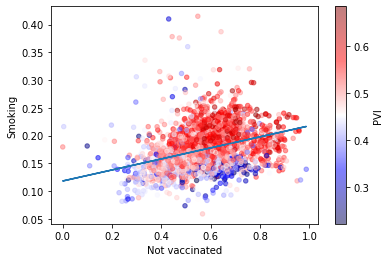

In [62]:
# Plot Not vaccinated against the other factors
pvi.plot.scatter(x='Not vaccinated', y='Smoking', c= "PVI", alpha=0.5, cmap='seismic', sharex=False)
#plt.xlabel("X")
x = pvi["Not vaccinated"]
y = pvi["Smoking"]
m, b = np.polyfit(x = pvi["Not vaccinated"], y= pvi["Smoking"], deg = 1)
plt.plot(x, m*x + b)

<AxesSubplot:xlabel='Not vaccinated', ylabel='Diabetes'>

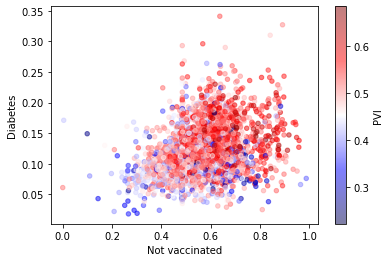

In [29]:
pvi.plot.scatter(x='Not vaccinated', y='Diabetes', c= "PVI", alpha=0.5, cmap='seismic', sharex=False)

<AxesSubplot:xlabel='Not vaccinated', ylabel='Obesity'>

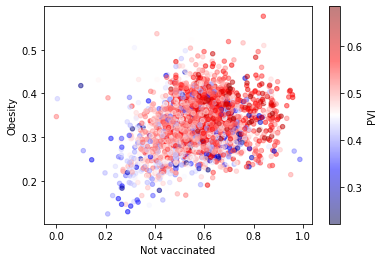

In [30]:
pvi.plot.scatter(x='Not vaccinated', y='Obesity', c= "PVI", alpha=0.5, cmap='seismic', sharex=False)

(0.0, 20000.0)

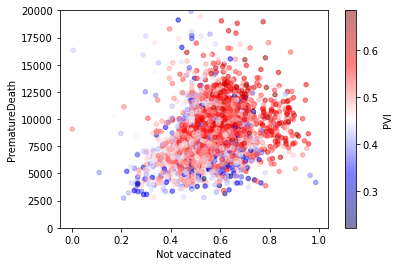

In [32]:
pvi.plot.scatter(x='Not vaccinated', y='PrematureDeath', c= "PVI", alpha=0.5, cmap='seismic', sharex=False)
plt.ylim(0, 20000)

(-100.0, 2000.0)

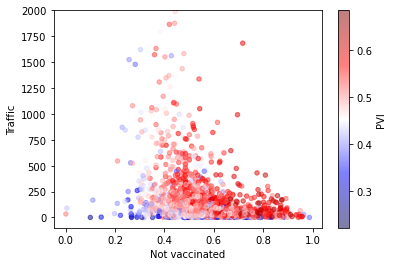

In [40]:
pvi.plot.scatter(x='Not vaccinated', y='Traffic', c= "PVI", alpha=0.5, cmap='seismic', sharex=False)
plt.ylim(-100, 2000)

(-500.0, 15000.0)

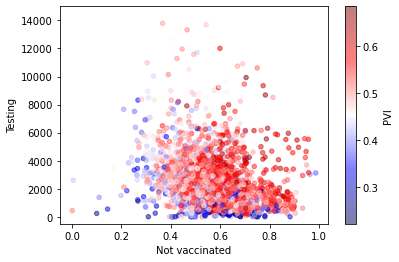

In [44]:
pvi.plot.scatter(x='Not vaccinated', y='Testing', c= "PVI", alpha=0.5, cmap='seismic', sharex=False)
plt.ylim(-500, 15000)

<AxesSubplot:xlabel='Not vaccinated', ylabel='Cases'>

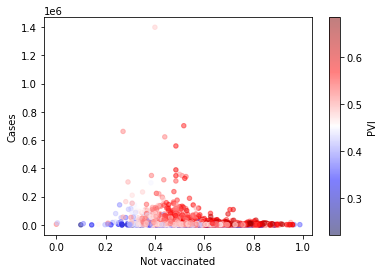

In [54]:
# Here we can see the cases are very low when vaccine rates are high
pvi.plot.scatter(x='Not vaccinated', y='Cases', c= "PVI", alpha=0.5, cmap='seismic', sharex=False)
#plt.ylim(-1, 1)

(-1.0, 30.0)

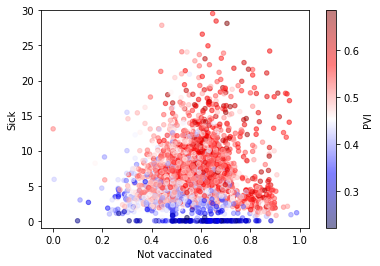

In [58]:
pvi.plot.scatter(x='Not vaccinated', y='Sick', c= "PVI", alpha=0.5, cmap='seismic', sharex=False)
plt.ylim(-1, 30)

<AxesSubplot:xlabel='Not vaccinated', ylabel='Spread'>

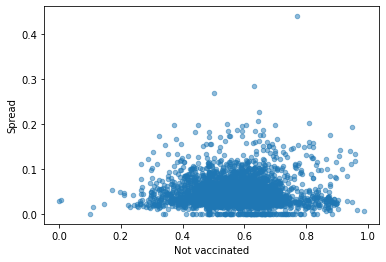

In [22]:
pvi.plot.scatter(x='Not vaccinated', y='Spread', alpha=0.5)

<AxesSubplot:xlabel='Not vaccinated', ylabel='Deaths'>

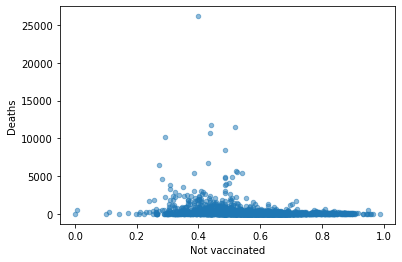

In [23]:
pvi.plot.scatter(x='Not vaccinated', y='Deaths', alpha=0.5)

<AxesSubplot:title={'center':'Not vaccinated'}, ylabel='Frequency'>

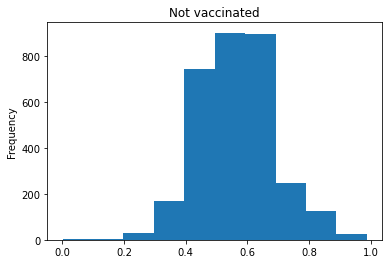

In [24]:
# The higher the score, the worse the vulnerability. The plot is centered around 0.6 with values generally high, hence vaccination rates are low.
pvi["Not vaccinated"].plot.hist(title="Not vaccinated")

In [25]:
pvi.shape

(3142, 25)

In [26]:
#pvi.to_csv('PVI_05_Oct_data_clean.csv', index=False)  

In [27]:
clist = pvi.columns.tolist()
print(clist)
clist.remove('fips')
clist.remove('Name')
print(clist, len(clist))

['fips', 'Name', 'Cases', 'Deaths', 'Sick', 'Spread', 'DaytimePopDensity', 'Traffic', 'SVIHousing', 'Not vaccinated', 'DistancingGrade', 'Testing', 'PctBeds', 'PctVentilators', 'PctBlack', 'PctNative', 'AirPollution', 'PctGE65', 'PrematureDeath', 'Smoking', 'Diabetes', 'Obesity', 'PctNoIns', 'SVISocioeconomic', 'PVI']
['Cases', 'Deaths', 'Sick', 'Spread', 'DaytimePopDensity', 'Traffic', 'SVIHousing', 'Not vaccinated', 'DistancingGrade', 'Testing', 'PctBeds', 'PctVentilators', 'PctBlack', 'PctNative', 'AirPollution', 'PctGE65', 'PrematureDeath', 'Smoking', 'Diabetes', 'Obesity', 'PctNoIns', 'SVISocioeconomic', 'PVI'] 23


## Future ideas
Predict Not vaccinated using the other factors